In [1]:
import json
import gc
import os
import numpy as np
import pandas as pd
from glob import glob
from pandas import json_normalize #package for flattening json in pandas df

path_to_json = './base/justica_estadual/processos-tjpr'
json_files = glob(path_to_json + '/*.json')
print(f'{len(json_files)} files found.')

12 files found.


In [2]:
#load json object
with open(path_to_json + '/processos-tjpr_2.json') as f:
    d = json.load(f)

df_dadosBasicos = json_normalize(d)
del d
gc.collect()

0

# Carregar CSV com as movimentações

In [3]:
df_sgt_mov = pd.read_csv('./base/sgt_movimentos.csv',sep=';').set_index('codigo')
df_sgt_mov

,descricao,cod_pai,cod_filhos
codigo,,,
1,Magistrado,NaN,"3,193,11009,7,11,25,56,63,83,108,113,117,122,1..."
3,Decisão,1.0,"7,11,25,56,63,83,108,113,117,122,133,138,146,1..."
7,Conversão,3.0,"266,821,12140,12473"
11,Declaração,3.0,"269,941,1003,12150,12151"
14,Serventuário,NaN,"15,18,48,104,865,12522,16,979,980,478,479,480,..."
...,...,...,...
12766,Por Divergência de Entendimento com o STF,12765.0,NaN
12767,Por Divergência de Entendimento com Tribunal S...,12765.0,NaN
12768,Manutenção de Acórdão,3.0,NaN


# Criar DataFrame a partir do JSON

In [4]:
#df_dadosBasicos.describe()
df_basic = df_dadosBasicos[['dadosBasicos.classeProcessual','dadosBasicos.numero','siglaTribunal','grau','movimento','dadosBasicos.assunto']]

# Obter informações do assunto

In [5]:
# Funcao que extrai o assunto
def obtem_assunto(linha):
    numero = pd.json_normalize(linha['dadosBasicos.assunto']).codigoNacional[0].astype(np.int)
    return numero

df_basic['assunto'] = df_basic.apply(obtem_assunto, axis=1)

df_basic.drop('dadosBasicos.assunto', axis='columns', inplace=True)

<ipython-input-5-00c46825f533>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic['assunto'] = df_basic.apply(obtem_assunto, axis=1)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Obter informações da movimentação processual

In [14]:
# Funcao que extrai info da movimentacao processual
def obtem_mov_qtd(linha):
    df_mov = pd.json_normalize(linha['movimento'])
    return df_mov['identificadorMovimento'].count()

# Funcao que extrai quantiodade de dias
def obtem_mov_dias(linha):
    df_mov = pd.json_normalize(linha['movimento'])
    df_mov['dataHora'] = pd.to_datetime(df_mov['dataHora'])
    return (df_mov['dataHora'].max() - df_mov['dataHora'].min()).days

df_basic['qtd_movimentos'] = df_basic.apply(obtem_mov_qtd, axis=1)
df_basic['dias'] = df_basic.apply(obtem_mov_dias, axis=1)

#df_basic.drop('dadosBasicos.assunto', axis='columns', inplace=True)

<ipython-input-14-fe9e1ff39c5c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic['qtd_movimentos'] = df_basic.apply(obtem_mov_qtd, axis=1)
<ipython-input-14-fe9e1ff39c5c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic['dias'] = df_basic.apply(obtem_mov_dias, axis=1)


In [15]:
df_basic.head(10)
#df_corr = df_basic.corr()
#df_corr

,dadosBasicos.classeProcessual,dadosBasicos.numero,siglaTribunal,grau,movimento,assunto,qtd_movimentos,dias
0,159,00022894920018160033,TJPR,G1,"[{'identificadorMovimento': '1', 'movimentoLoc...",9582,119,1424
1,1117,00090389120058160017,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",10494,110,1531
2,172,00133987320098160035,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",10585,13,41
3,159,00229162420118160001,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",4960,69,928
4,1116,00075496820088160193,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",6017,13,185
5,159,00113650820118160014,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",9606,18,548
6,1116,00022034420118160028,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",6017,19,770
7,1116,00012857820078160190,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",5946,55,1178
8,1116,00005136820118160031,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",6017,59,1388
9,1116,00000024419248160185,TJPR,G1,"[{'identificadorMovimento': '1', 'tipoResponsa...",6017,28,303


<AxesSubplot:xlabel='assunto', ylabel='qtd_movimentos'>

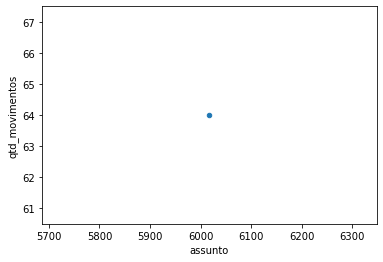

In [8]:
df_basic.plot.scatter(x='assunto', y='qtd_movimentos')

# Setar multi-indice

In [9]:
#df_basic = df_basic.set_index(['dadosBasicos.classeProcessual','assunto','dadosBasicos.numero']).sort_index()
#df_basic

# Normalizar JSON aninhado de um processo qualque

In [10]:
df_mov = pd.json_normalize(df_dadosBasicos.loc[4014].movimento)

# Tabela com movimentações ordenados pela data e join no movimento

In [11]:
df_mov['dataHora'] = pd.to_datetime(df_mov['dataHora'])
df_mov_desc = df_mov.set_index('movimentoNacional.codigoNacional').join(df_sgt_mov).sort_values('dataHora')
df_mov_desc[['dataHora','descricao']]
#df_mov_desc['duracao_movimento'] = df_mov_desc['dataHora'].apply(lambda x: x - x.shift())

,dataHora,descricao
NaN,2019-03-20 14:10:00,NaN
123.0,2019-03-20 14:10:14,Remessa
581.0,2019-03-21 08:30:21,Documento
132.0,2019-03-21 08:30:21,Recebimento
60.0,2019-04-02 14:36:04,Expedição de documento
NaN,2019-04-03 12:13:24,NaN
85.0,2019-04-03 17:07:20,Petição
51.0,2019-05-08 14:06:03,Conclusão
463.0,2019-07-02 18:47:58,Desistência
60.0,2019-07-29 17:49:09,Expedição de documento


In [12]:
#

#def obtem_numero(linha):
#    dias = df_mov_desc.iloc[1,7]-df_mov_desc.iloc[-1,7]
#    return numero

df_mov_desc['diff'] = df_mov_desc['dataHora'].diff().dt.days
df_mov_desc
#df_mov_desc[['identificadorMovimento',]]


#df_mov_desc['diff'] = df_mov_desc['dataHora'].apply(lambda x: x.shift())
#df_mov_desc

#for x in range(df_mov_desc['dataHora'].count()):
#    display(df_mov_desc.iloc[x,7]-df_mov_desc.iloc[x-1,7])



,identificadorMovimento,tipoResponsavelMovimento,movimentoNacional,complementoNacional,idDocumentoVinculado,nivelSigilo,orgaoJulgador,dataHora,tipoDecisao,movimentoLocal.movimentoLocalPai,movimentoLocal.codigoMovimento,movimentoLocal.codigoPaiNacional,movimentoLocal,descricao,cod_pai,cod_filhos,diff
NaN,1,None,NaN,[],[],None,None,2019-03-20 14:10:00,None,NaN,50050.0,48.0,NaN,NaN,NaN,NaN,NaN
123.0,2,None,NaN,[],[],None,None,2019-03-20 14:10:14,None,NaN,NaN,NaN,NaN,Remessa,48.0,NaN,0.0
581.0,3,None,NaN,[],[],None,None,2019-03-21 08:30:21,None,NaN,NaN,NaN,NaN,Documento,67.0,NaN,0.0
132.0,4,None,NaN,[],[],None,None,2019-03-21 08:30:21,None,NaN,NaN,NaN,NaN,Recebimento,48.0,NaN,0.0
60.0,5,None,NaN,[],[],None,None,2019-04-02 14:36:04,None,NaN,NaN,NaN,NaN,Expedição de documento,48.0,NaN,12.0
NaN,6,None,NaN,[],[],None,None,2019-04-03 12:13:24,None,NaN,50001.0,48.0,NaN,NaN,NaN,NaN,0.0
85.0,7,None,NaN,"[{'descricaoComplemento': 'tipo_de_peticao', '...",[],None,None,2019-04-03 17:07:20,None,NaN,NaN,NaN,NaN,Petição,67.0,NaN,0.0
51.0,8,None,NaN,[],[],None,None,2019-05-08 14:06:03,None,NaN,NaN,NaN,NaN,Conclusão,48.0,NaN,34.0
463.0,9,None,NaN,[],[],None,None,2019-07-02 18:47:58,None,NaN,NaN,NaN,NaN,Desistência,456.0,NaN,55.0
60.0,10,None,NaN,[],[],None,None,2019-07-29 17:49:09,None,NaN,NaN,NaN,NaN,Expedição de documento,48.0,NaN,26.0


# Todo:
[ ] Fazer a mesma tabela acima só que multi-indice para todos os processos de mesma classe/assunto e comparar  